# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.api as sms # for comparison of means t-test. 

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
sum(data[data.race=='w'].call)

235.0

In [5]:
data.race.value_counts()

b    2435
w    2435
Name: race, dtype: int64

In [6]:
data.shape

(4870, 65)

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
_ = sns.barplot(x='race', y='call', data=data)

1. A two-sample t-test is appropriate here since we don't know the true standard deviation of the samples. Yes, the central limit theorem applies. The sample size of 4870 is sufficiently large, and the data is independent. 
2. Let $\mu_w$ be the mean of callbacks for white-sounding names, and $\mu_b$ be the mean of callbacks for black-sounding names. The null hypothesis is that $\mu_w=\mu_b$. The alternative hypothesis is that $\mu_b\neq\mu_w$. 

In [8]:
w = data[data.race=='w']
b = data[data.race=='b']

In [9]:
# Your solution to Q3 here

#### Bootstrap method

In [10]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

mean_call = np.mean(data.call)
observed_diff = np.mean(w.call) - np.mean(b.call)

w_shifted = w.call - np.mean(w.call) + mean_call
b_shifted = b.call - np.mean(b.call) + mean_call 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_w = draw_bs_reps(w_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(b_shifted, np.mean, size = 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_w - bs_replicates_b

std_err = np.std(bs_replicates)
# Compute and print p-value: p
t_value = stats.t.ppf(1-0.025, 4869)
p = np.sum(bs_replicates >= (np.mean(w.call)-np.mean(b.call))) / 10000
print('p-value =', p)
print('Confidence interval: {}'.format(np.percentile(bs_replicates,[2.5, 97.5])))
print('Margin of error: {}'.format(stats.t.ppf(1-0.025, 4869)*std_err))

p-value = 0.0
Confidence interval: [-0.0151951   0.01519504]
Margin of error: 0.015208266049981828


#### Frequentist method

In [11]:
compare_means_obj = sms.CompareMeans.from_data(w.call, b.call)
t_test= compare_means_obj.ttest_ind()
print('p_value=', t_test[0])
print('Confidence interval: ', compare_means_obj.tconfint_diff())
std_err_freq = np.sqrt(((np.std(w.call)**2)/w.shape[0])+ ((np.std(b.call)**2)/b.shape[0]))
print('Margin of error: {}'.format(stats.t.ppf(1-0.025, 4869)*std_err_freq))

p_value= 4.114705246593625
Confidence interval:  (0.016770799977396562, 0.04729490844149461)
Margin of error: 0.015258797171631415


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

## 4. Write a story describing the statistical significance in the context or the original problem.

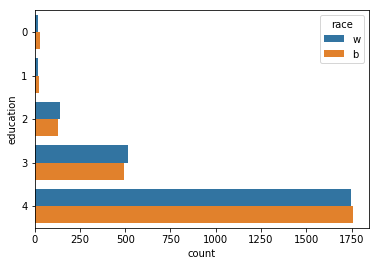

In [38]:
_ = sns.countplot(y='education', hue='race', data=data)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [25]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [31]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

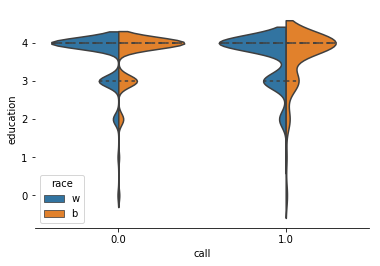

In [27]:
sns.violinplot(x ='call', y='education', hue="race",
               split=True, inner="quart",
               data=data)
sns.despine(left=True)

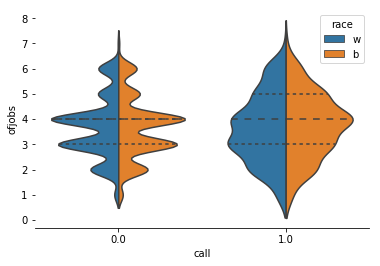

In [28]:
sns.violinplot(x ='call', y='ofjobs', hue="race",
               split=True, inner="quart",
               data=data)
sns.despine(left=True)

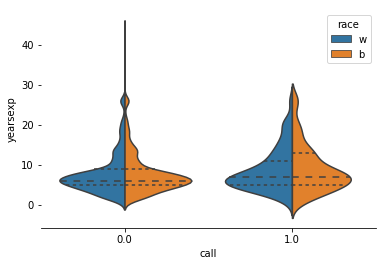

In [29]:
sns.violinplot(x ='call', y='yearsexp', hue="race",
               split=True, inner="quart",
               data=data)
sns.despine(left=True)

In [37]:
?sns.distplot

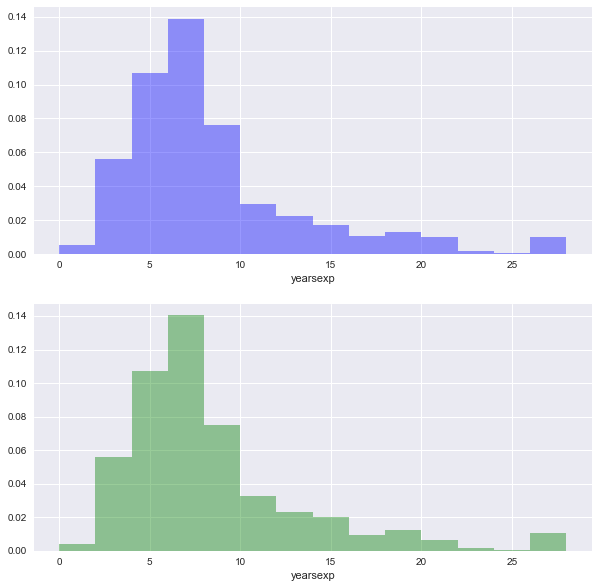

In [54]:
f, ax = plt.subplots(2,1,figsize=(10,10))
sns.distplot(w.yearsexp, color='blue', bins=range(0, 30, 2), kde=False, norm_hist=True, ax=ax[0])
sns.distplot(b.yearsexp, color='green', bins=range(0, 30, 2), kde=False, norm_hist=True, ax=ax[1])

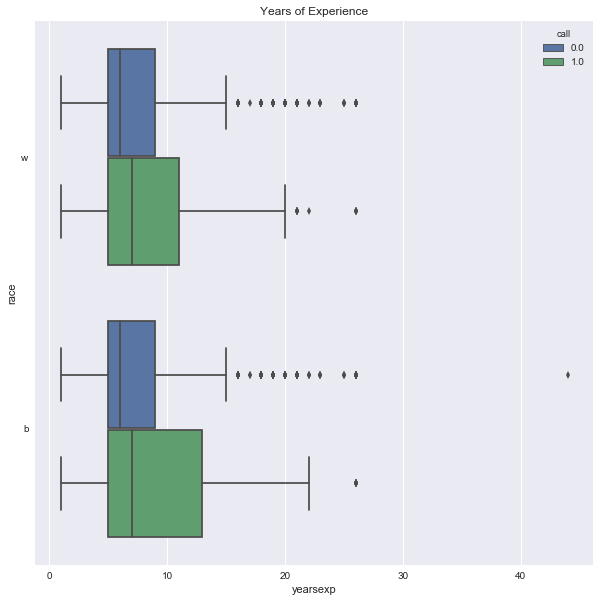

In [64]:
_ = plt.subplots(figsize=(10,10))
_ = sns.boxplot(x='yearsexp', y='race', hue='call', data=data)
_= plt.title('Years of Experience')

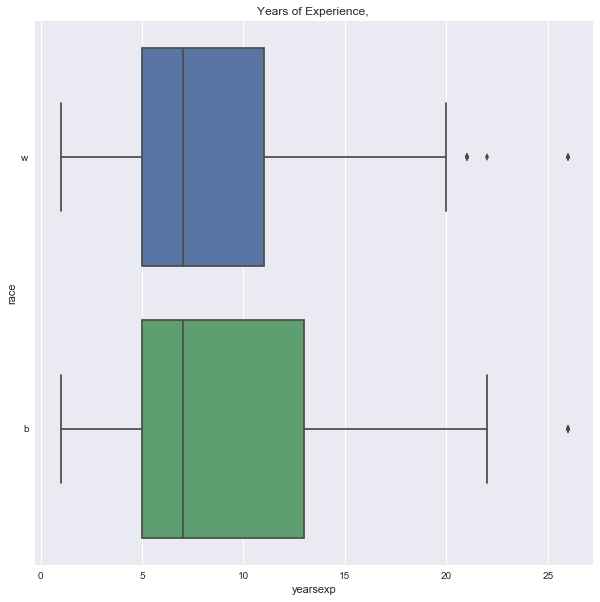

In [63]:
_ = plt.subplots(figsize=(10,10))
_ = sns.boxplot(x='yearsexp', y='race', data=data[data.call==1])
_= plt.title('Years of Experience, ')

In [18]:
sns.factorplot?

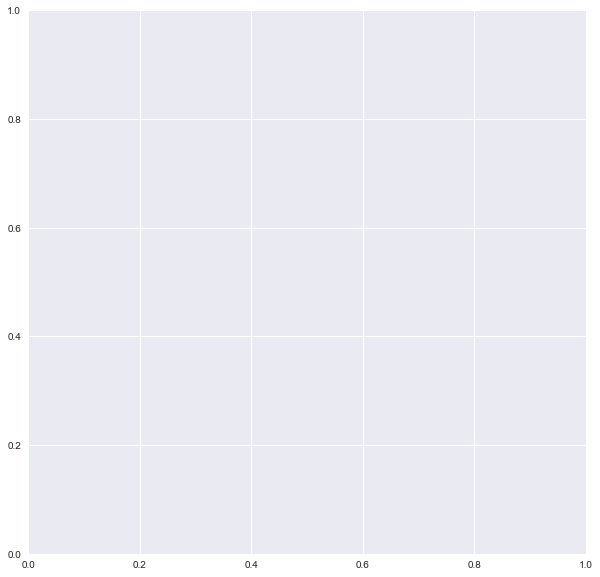

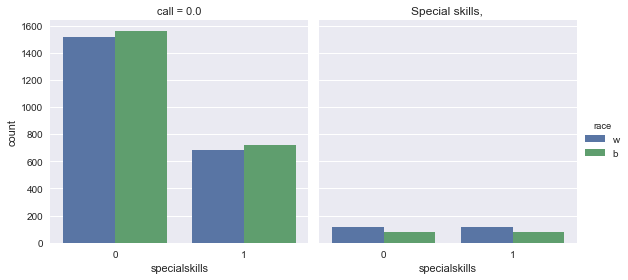

In [19]:
_ = plt.subplots(figsize=(10,10))
_ = sns.factorplot('specialskills', hue='race', col = 'call', data=data, kind='count')
_= plt.title('Special skills, ')

## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

What we tested was whether or not there is a statistically significant difference in the number of callbacks for white candidates and black candidates. We showed that there is a correlation between race and callback: namely, candidates with black-sounding names are less likely to receive a callback than a candidate with a white-sounding name. 

We have not shown that this is the most important factor in callback success. This would require carrying out statistical significance test for other parameters (such as education, number of jobs, years of experience, etc). 

The hypothesis we really want to test here is: candidates with white-sounding names and black-sounding names that have similar qualifications are equally likely to receive a callback. 

Rejecting this null hypothesis would prove more compelling evidence that race is a very important factor in callback success. 